# Airfare Price Prediction

<img src="https://miro.medium.com/max/6054/0*kp8rJzqHjagMj22J" align="center" width="1000" height="400">

## **Problem Statement**

### _Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travelers saying that flight ticket prices are so unpredictable. As data scientists, we are gonna prove that given the right data anything can be predicted. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities._

## FEATURES DESCRIPTION :

- Airline: The name of the airline.

- Date_of_Journey: The date of the journey

- Source: The source from which the service begins.

- Destination: The destination where the service ends.

- Route: The route taken by the flight to reach the destination.

- Dep_Time: The time when the journey starts from the source.

- Arrival_Time: Time of arrival at the destination.

- Duration: Total duration of the flight.

- Total_Stops: Total stops between the source and destination.

- Additional_Info: Additional information about the flight

- Price: The price of the ticket

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Reading Our Data 

In [2]:
df = pd.read_excel('Data_Train.xlsx')

## Understanding the Dataset

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


## **Exploratory Data Analysis**

In [5]:
df.shape ## Our dataset has 10683 observations and 11 features

(10683, 11)

In [6]:
df.dtypes  # Checking the datatypes 

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [7]:
df.isnull().sum()   ## Cheking the null values

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

### **Removing the Null Values From Our Dataset**

In [8]:
df.dropna(how = 'any',inplace = True)
df.isnull().sum()   ## We don't have any missing values anymore

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

## Destination Preprocessing

In [9]:
df.Destination = df.Destination.apply(lambda x : x if x != 'New Delhi' else 'Delhi') # Replacing New Delhi with Delhi since they are the same 

# Feature Engineering

#### Let's convert **Data_of_Journey** to its appropriate format as datetime with regards to **day** and **month**

## Data_of_Journey

In [10]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])

In [11]:
df['Day_of_Journey'] = df.Date_of_Journey.dt.day       ## We get all the days values to a new column

In [12]:
df['Month_of_Journey'] = df.Date_of_Journey.dt.month     ## We get all the month values to a new column

In [13]:
df.drop('Date_of_Journey',axis = 1,inplace = True)

### Let's convert **Arrival time** to its appropriate format as datetime with regards to **hour** and **minute**

## Arrival Time

In [14]:
df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'])

In [15]:
df['Arrival_hr'] = df.Arrival_Time.dt.hour
df['Arrival_min'] = df.Arrival_Time.dt.minute

In [16]:
df.drop('Arrival_Time',inplace= True,axis=1)

## Duration Time

In [17]:
duration=df['Duration'].str.split(' ',expand=True) #split duration datapoints based space ' '
duration[1].fillna('00m',inplace=True)   #fill all "NAN" with '00m'
df['duration_hr']=duration[0].apply(lambda x: x[:-1]) #select the item at index o and leave the last one (in this case the 'h'﴿
df['duration_min']=duration[1].apply(lambda x: x[:-1]) #select the item at index 1 and leave the last one (in this case the 'm')

In [18]:
# We can now drop the duration column
df.drop('Duration',inplace=True,axis=1)

In [19]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Arrival_hr,Arrival_min,duration_hr,duration_min
0,IndiGo,Banglore,Delhi,BLR → DEL,22:20,non-stop,No info,3897,24,3,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,2 stops,No info,7662,5,1,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,2 stops,No info,13882,6,9,4,25,19,00
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,1 stop,No info,6218,5,12,23,30,5,25
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,16:50,1 stop,No info,13302,3,1,21,35,4,45


## Dep_Time

In [20]:
# convert to datetime
df['Dep_hr'] = pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_min']= pd.to_datetime(df['Dep_Time']).dt.minute

In [21]:
# we can now drop the 'Dep_Time'
df.drop(['Dep_Time'],axis=1,inplace=True)

In [22]:
df.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Arrival_hr,Arrival_min,duration_hr,duration_min,Dep_hr,Dep_min
0,IndiGo,Banglore,Delhi,BLR → DEL,non-stop,No info,3897,24,3,1,10,2,50,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,13,15,7,25,5,50


### Airline Value Counting

In [23]:
df['Airline'].value_counts().to_frame()

,Airline
Jet Airways,3849
IndiGo,2053
Air India,1751
Multiple carriers,1196
SpiceJet,818
Vistara,479
Air Asia,319
GoAir,194
Multiple carriers Premium economy,13
Jet Airways Business,6


## Airline vs Price 

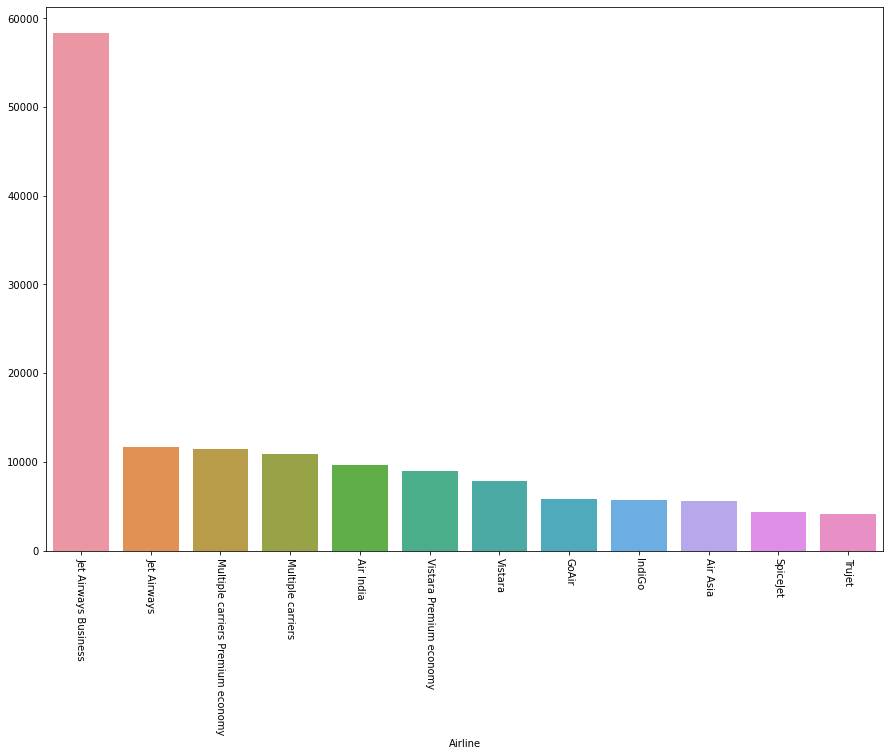

In [24]:
airprices = df.groupby('Airline')['Price'].mean().sort_values(ascending = False)
plt.figure(figsize=(15,10))
sns.barplot(airprices.index,airprices.values)
plt.xticks(rotation = 270)
plt.show()

- #### Insıghts

**Jet Airways Business** has the highest price while **Trujet** has the lowest

## BoxPlot

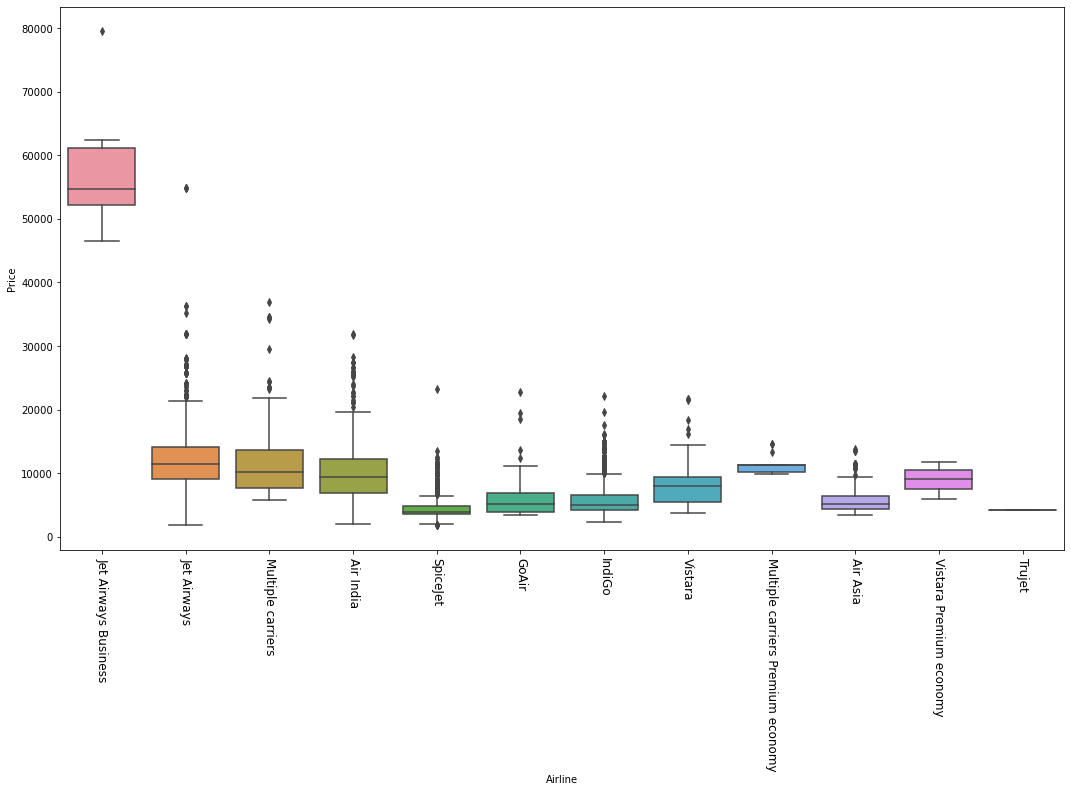

In [25]:
plt.figure(figsize = (18,10))
sns.boxplot(y= "Price",x = "Airline",data = df.sort_values("Price",ascending = False))
plt.xticks(rotation = 270,fontsize =12)
plt.show()

### Price Based on Total_Stops

In [26]:
df.groupby(["Airline","Total_Stops"])["Price"].mean().to_frame()

Price
Airline                           Total_Stops              
Air Asia                          1 stop        7078.325581
                                  2 stops       6341.888889
                                  non-stop      4492.331492
Air India                         1 stop        9041.509259
                                  2 stops      12092.779101
                                  3 stops      12208.054054
                                  4 stops      17686.000000
                                  non-stop      5605.326139
GoAir                             1 stop        6884.676471
                                  non-stop      4726.173913
IndiGo                            1 stop        7104.717528
                                  2 stops       7507.526316
                                  non-stop      4731.174053
Jet Airways                       1 stop       12512.741223
                                  2 stops      13387.247467
                                  non-stop      6175.078652
Jet Airways Business              1 stop       62844.250000
                                  2 stops      49387.500000
Multiple carriers                 1 stop       10711.316157
                                  2 stops      14809.395349
                                  3 stops      17292.750000
Multiple carriers Premium economy 1 stop       11418.846154
SpiceJet                          1 stop        6750.560811
                                  non-stop      3805.423881
Trujet                            1 stop        4140.000000
Vistara                           1 stop        9641.148837
                                  non-stop      6293.954545
Vistara Premium economy           non-stop      8962.333333

### Insıghts

-  The table shows us in general as total stops increase, price is increasing as well

### Let's get the plot to see the relationship between Airline and Price by Total Stops

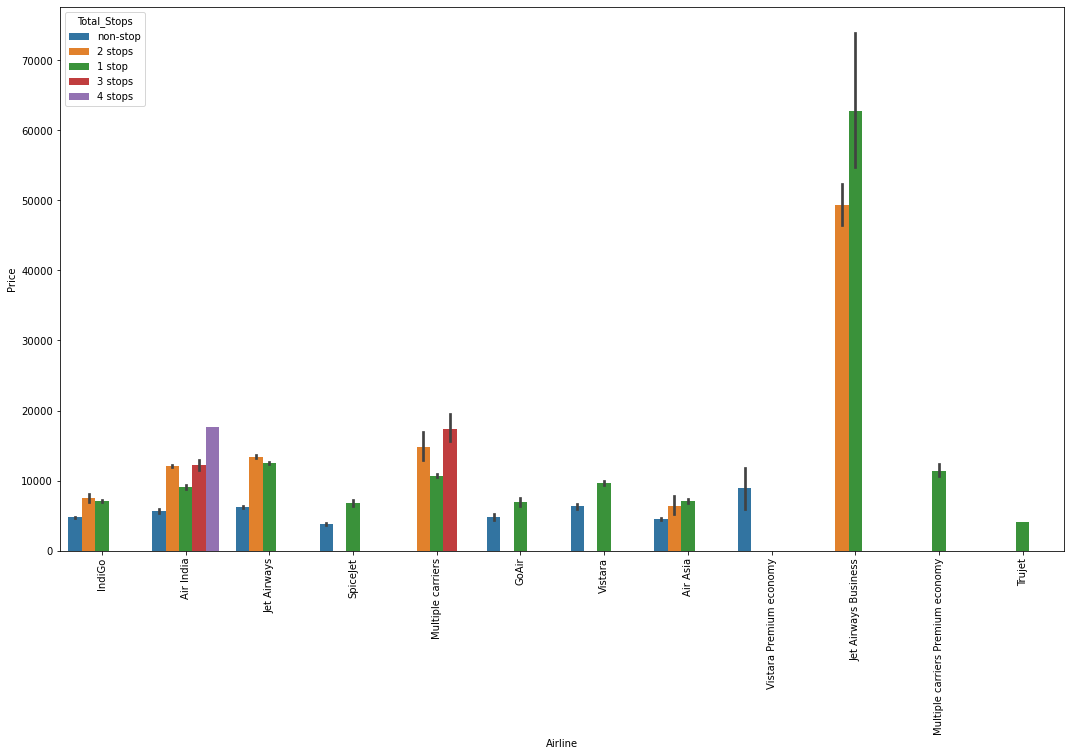

In [27]:
plt.figure(figsize=(18,10))
ax = sns.barplot(x = df["Airline"],y =df["Price"],hue = df["Total_Stops"])
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

In [28]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Arrival_hr,Arrival_min,duration_hr,duration_min,Dep_hr,Dep_min
0,IndiGo,Banglore,Delhi,BLR → DEL,non-stop,No info,3897,24,3,1,10,2,50,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,13,15,7,25,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,4,25,19,00,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,23,30,5,25,18,5
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,21,35,4,45,16,50


In [29]:
pd.options.display.max_columns = None

## Handling Categorical Values

In [30]:
#Handling Categorical Values 
df['Total_Stops']=df['Total_Stops'].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4})
air_dummy=pd.get_dummies(df['Airline'],drop_first=True)
# print(df['Source'].value_counts())
# print(df['Destination'].value_counts())

source_dest_dummy=pd.get_dummies(df[['Source','Destination']],drop_first=True)
df=pd.concat([air_dummy,source_dest_dummy,df],axis=1)

In [35]:
df.drop(['Airline','Source','Destination','Additional_Info',"Route"],inplace=True,axis=1)
df.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Arrival_hr,Arrival_min,duration_hr,duration_min,Dep_hr,Dep_min
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3897,24,3,1,10,2,50,22,20
1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,7662,5,1,13,15,7,25,5,50
2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,2,13882,6,9,4,25,19,00,9,25
3,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,6218,5,12,23,30,5,25,18,5
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,13302,3,1,21,35,4,45,16,50


## Saving Our Preprocessed Dataset

In [39]:
df.duration_hr = df.duration_hr.astype('int64')
df.duration_min = df.duration_min.astype('int64')

In [42]:
df.to_csv('preprocessed.csv',index = False)

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Arrival_hr,Arrival_min,duration_hr,duration_min,Dep_hr,Dep_min
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3897,24,3,1,10,2,50,22,20
1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,7662,5,1,13,15,7,25,5,50
2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,2,13882,6,9,4,25,19,00,9,25
3,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,6218,5,12,23,30,5,25,18,5
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,13302,3,1,21,35,4,45,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,4107,4,9,22,25,2,30,19,55
10679,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,4145,27,4,23,20,2,35,20,45
10680,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,7229,27,4,11,20,3,00,8,20
10681,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,12648,3,1,14,10,2,40,11,30
